In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [45]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 47s 782us/sample - loss: 0.2162 - accuracy: 0.9343
Epoch 2/10
60000/60000 [==============================] - 45s 743us/sample - loss: 0.0882 - accuracy: 0.9729
Epoch 3/10
60000/60000 [==============================] - 45s 751us/sample - loss: 0.0609 - accuracy: 0.9814
Epoch 4/10
60000/60000 [==============================] - 44s 735us/sample - loss: 0.0440 - accuracy: 0.9862
Epoch 5/10
60000/60000 [==============================] - 44s 736us/sample - loss: 0.0362 - accuracy: 0.9881
Epoch 6/10
60000/60000 [==============================] - 45s 745us/sample - loss: 0.0301 - accuracy: 0.9901
Epoch 7/10
60000/60000 [==============================] - 44s 727us/sample - loss: 0.0269 - accuracy: 0.9914
Epoch 8/10
60000/60000 [==============================] - 44s 732us/sample - loss: 0.0224 - accuracy: 0.9926- loss: 0.0
Epoch 9/10
60000/60000 [==============================] - 45s 749us/sample - loss: 0.0193 - ac

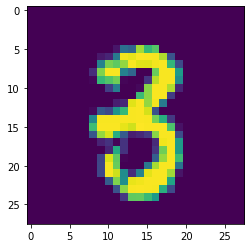

(1, 28, 28, 1)
Tensor("conv2d_1_input:0", shape=(None, 28, 28, 1), dtype=float32)
chal na <tensorflow.python.keras.engine.training.Model object at 0x0000013C51F2DC08>
(1, 26, 26, 28)
(1, 13, 13, 28)


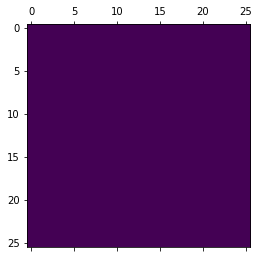

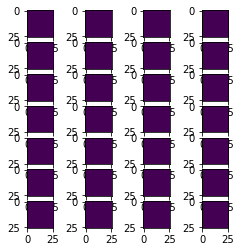

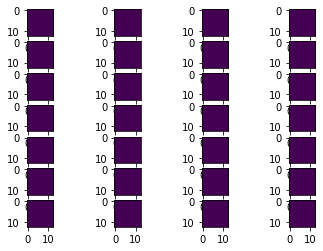

In [43]:
from keras.preprocessing import image
import numpy as np

img_tensor = image.img_to_array(x_test[2853])
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

from keras import models
layer_outputs = [layer.output for layer in model.layers[:6]]
print(model.input)
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs) 
print("chal na",activation_model)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 14], cmap='viridis')
second_layer_activation = activations[1]
print(second_layer_activation.shape)
plt.matshow(second_layer_activation[0, :, :, 10], cmap='viridis')

for i in range(28):
    plt.subplot(7,4,i+1)    # the number of images in the grid is 7*4 (28)
    plt.imshow(activations[0][0, :, :, i], cmap='viridis')

plt.show()

for i in range(28):
    plt.subplot(7,4,i+1)    # the number of images in the grid is 7*4 (28)
    plt.imshow(activations[1][0, :, :, i], cmap='viridis')

plt.show()

In [39]:
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)

print(layer_names)
images_per_row = 14

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    print("size is", size)
    n_cols = n_features // images_per_row
    print("n_cols=",n_cols," images per row=", images_per_row," n_features=",n_features)
    print(size * n_cols, images_per_row * size)
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            #channel_image -= channel_image.mean()
            #channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image

scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

['conv2d_1', 'max_pooling2d_1', 'flatten_1', 'dense_2', 'dropout_1', 'dense_3']
size is 26
n_cols= 2  images per row= 14  n_features= 28
52 364
size is 13
n_cols= 2  images per row= 14  n_features= 28
26 182
size is 4732
n_cols= 338  images per row= 14  n_features= 4732
1599416 66248


MemoryError: Unable to allocate 789. GiB for an array with shape (1599416, 66248) and data type float64

In [6]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 261us/sample - loss: 0.0738 - accuracy: 0.9848


[0.07375249823103087, 0.9848]

3


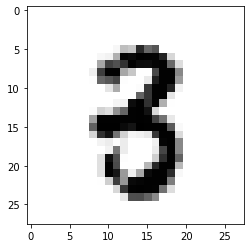

In [7]:
image_index = 2853
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())